
***************************** Version 1: Hours by Tag ***********************************
                                                                 tags      hours
                                                                  ttv 191.715556
                                                                  dan 136.356389
                                                                  tic 107.977778
                                                        dan: planning 101.788889
                                                   discrete: planning  63.947222
                                                        communication  38.046111
                                                discrete: teaching fi  26.873889
                                                                  yfs  18.031389
                                         vanhaa valintakoetta pystyyn  16.216667
                                                        dan: teaching  10.186944
                  

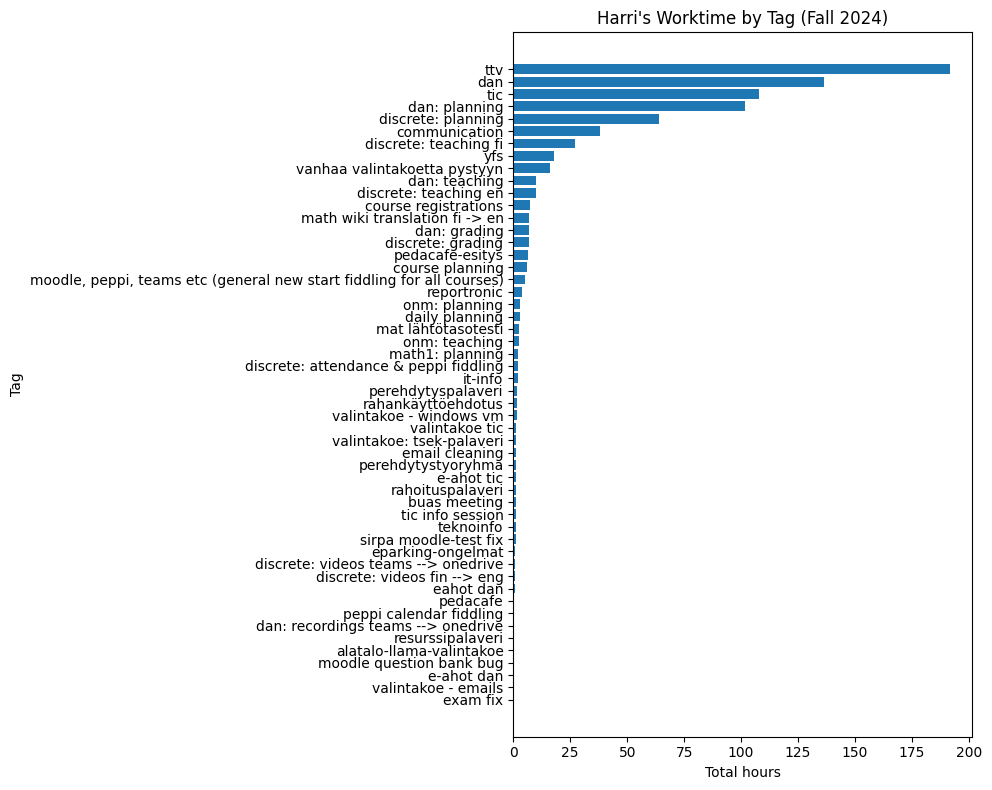

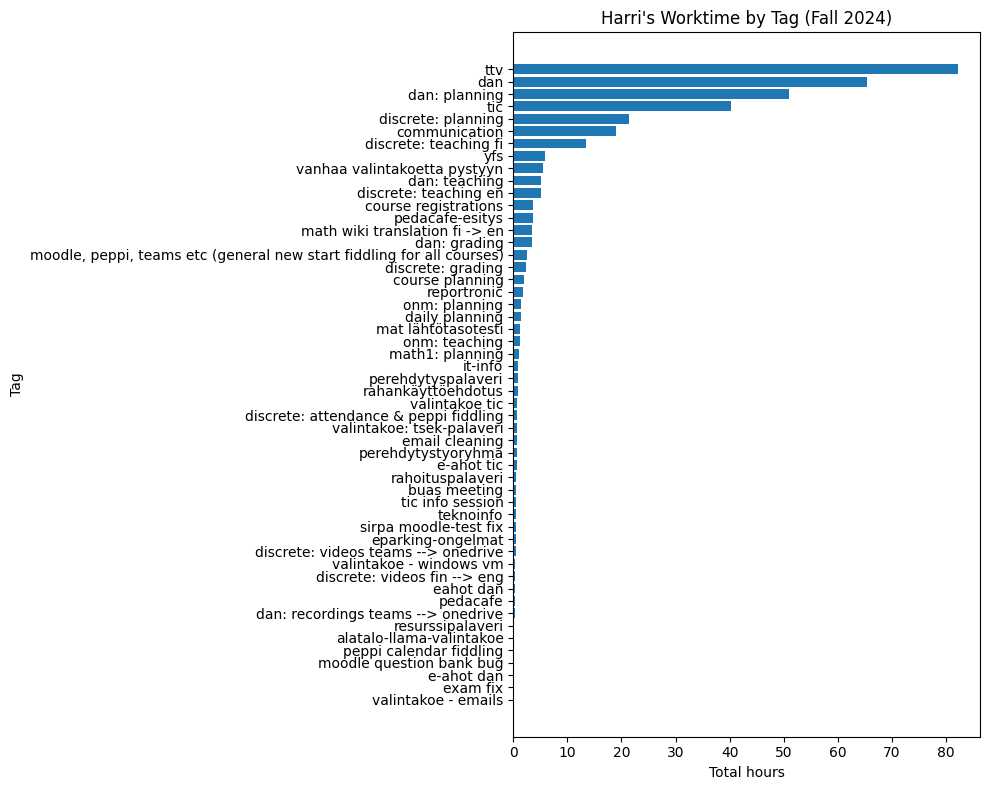

In [ ]:
from getpass import getuser
import pandas as pd
import matplotlib.pyplot as plt

# user = getuser()
# json_location = f'/home/{user}/dan/public/exrc_04/data/harri_worktimes.json'
json_location = "harri_worktimes.json"
# json_location =  "FILE_NAME" ### GIVE FILE_NAME TO RUN THE CODE LOCALLY

# Load input JSON data which contains Harri's worktime data from fall 2024
df = pd.read_json(json_location)

# # Lets describe and check the data and properties of dataframe
# print(df.info())  # prints concise summary about DataFrame's structure
# print(df.columns) # prints information about columns
# print(df.head())  # prints first five rows - default

# Convert the start and end column datatypes to datetime type with proper readable date format which can used to calculate hours
df["start"] = pd.to_datetime(df["start"], format="%Y%m%dT%H%M%SZ")
df["end"]   = pd.to_datetime(df["end"],   format="%Y%m%dT%H%M%SZ")

# Create a new column ´hours´ by using ´start´ and ´end' columns
df["hours"] = (df["end"] - df["start"]).dt.total_seconds() / 3600.0

# print(df.head()) # check the sample data

# Version 1: Here explode the data without dividing the hours at tag level ie doubling the hours
# Mean while exploding the ´tags´ column each tag get the same effort from ´hours´ column 

# Create separate entry for each tag value present in ´tags´ column using ´explode´ method
df_extend_ver1 = df.explode("tags")

# print(df_extend_ver1.head()) # check the sample data
df_extend_ver1.to_csv("df_extend_ver1.csv", index=False) # create a file for validation


# Perform groupby at ´tags´ to get the sum of ´hours´ coloumn
df_extend_group_by_tag_ver1 = (
    df_extend_ver1.groupby("tags")["hours"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

print("\n***************************** Version 1: Hours by Tag ***********************************")
print(df_extend_group_by_tag_ver1.to_string(index=False))

# Version1: Plot a Horizontal Bar Chart
plt.figure(figsize=(10, 8))
plt.barh(df_extend_group_by_tag_ver1["tags"], df_extend_group_by_tag_ver1["hours"])
plt.xlabel("Total hours")
plt.ylabel("Tag")
plt.title("Version 1: Harri's Worktime by Tag (Fall 2024)")
plt.gca().invert_yaxis() #flips the order of bars vertically so the largest values appear at the top instead of the bottom
plt.tight_layout()



# Version 2: Here explode the data post normalising the hours per tag
# Mean first calculate the hours per tags by then explode the data

# Create new column ´hours_per_tag´ to divide the effort at tag level
df["hours_per_tag"] = df["hours"] / df["tags"].apply(len)

# Create separate entry for each tag value present in ´tags´ column using ´explode´ method
df_extend_ver2 = df.explode("tags")

#print(df_extend_ver2.head()) # check the sample data
df_extend_ver2.to_csv("df_extend_ver2.csv", index=False) # create a file for validation

# Perform groupby at ´tags´ to get the sum of ´hours_per_tag´ coloumn
df_extend_group_by_tag_ver2 = (
    df_extend_ver2.groupby("tags")["hours_per_tag"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

print("\n***************************** Version 2: Hours by Tag ***********************************")
print(df_extend_group_by_tag_ver2.to_string(index=False))

# Version 2: Plot a Horizontal Bar Chart
plt.figure(figsize=(10, 8))
plt.barh(df_extend_group_by_tag_ver2["tags"], df_extend_group_by_tag_ver2["hours_per_tag"])
plt.xlabel("Total hours")
plt.ylabel("Tag")
plt.title("Version 2:  Harri's Worktime by Tag (Fall 2024)")
plt.gca().invert_yaxis()
plt.tight_layout()
